## Kaggle Titanic

### Feat7/wip (Acc: on test set 0.8156424)
#### Slightly worse than feat2
Branced from EDA1 for feature engineering based on knowledge obtained from EDA
- Assign age to NaN values based on initials
- Assign S to NaN values
- Dropped Cabin, name, ticket and passengerID

In [6]:
%%bash
git log

commit 62cf47e4aa430def788c56d9d0e0166504456248
Author: Theerit <Theerit.L@gmail.com>
Date:   Sun Mar 4 15:09:04 2018 +0700

    Model ready to be trained (still not trained)

commit 126d9ebf1189baaade67723f0a153d4b2288688e
Author: Theerit <Theerit.L@gmail.com>
Date:   Sun Mar 4 15:08:46 2018 +0700

    Model ready to be trained (still not trained)

commit b268a9f851991fb3850731497b1cdd6d1ecaa5fd
Author: Theerit <Theerit.L@gmail.com>
Date:   Sun Mar 4 14:47:14 2018 +0700

    Modified code to perform feature engineering to test dataframe

commit 69c4a0eb304cbaaa48be182e382c3e0e60ab8e73
Author: Theerit <Theerit.L@gmail.com>
Date:   Sun Mar 4 14:23:26 2018 +0700

    Modified code to drop name and cabin feature

commit 8f536f1873f3b48bbd8c3f6cb88d5809c2e488f8
Author: Theerit <Theerit.L@gmail.com>
Date:   Sun Mar 4 14:21:09 2018 +0700

    Modified code to drop name and cabin feature

commit 2ddbd789cedc8083182e3def97a6532a3ea79d27
Author: Theerit <Theerit.L@gmail.com>
Date:   Sun Mar 4 1

In [90]:
%%bash
git add 'Titanic.ipynb'
git add 'Test_data.ipynb'
git commit -m 'Finished model training moving on to creating submission file'
git push --set-upstream origin 'feat7(EDA1)/wip'

[feat7(EDA1)/wip 4e17e8f] Finished model training moving on to creating submission file
 1 file changed, 638 insertions(+), 335 deletions(-)
Branch feat7(EDA1)/wip set up to track remote branch feat7(EDA1)/wip from origin.


To github.com:Theerit/Kaggle_Titanic.git
   62cf47e..4e17e8f  feat7(EDA1)/wip -> feat7(EDA1)/wip


In [65]:
filename= 'feat7.sav'

As usual, import all neccasary stuff into the notebook

In [66]:
%matplotlib inline 
import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn.model_selection

### Feature Engineering (based on EDA1 branch)

First, I will start by loading the data in panda dataframe and do some EDA.

In [67]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
#Concate train and test to avoid mismatch features in the testing phase
#train_objs_num = len(train)
#dataset = pd.concat(objs=[train, test], axis=0)
#dataset = pd.get_dummies(dataset)
#train = dataset.copy(dataset[:train_objs_num])
#train = dataset[:train_objs_num].copy()
#test = dataset.copy(dataset[train_objs_num:])
#test = dataset[train_objs_num:].copy()
print(train.shape)

(891, 12)


Take a peek look at raw data table.

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It appears that the test data has no label(answer class) and seems to serve submission function. Cross validation and model evaluation will be done based on the data provided in Train.csv file only. Next, split dataframe into X and Y dataframe where X store the data while Y store the label.

In [69]:
X = train.copy()
#X = X.drop('Survived',axis=1)
X_plot = train.copy()
X = X.drop('PassengerId',axis=1)  # Shouldn't relate to survival chance
X = X.drop('Cabin',axis=1)
X = X.drop('Ticket',axis=1)

#Mirror action on X to test
#test = test.drop('PassengerID',axis=1)
test = test.drop('PassengerId',axis=1)
test = test.drop('Cabin',axis=1)
test = test.drop('Ticket',axis=1)

#X = X.drop('Name',axis=1)
Y = pd.DataFrame(train['Survived'])

In [70]:
Y[Y['Survived']==1].count()

Survived    342
dtype: int64

### Extract age from name

Extract some useful information from name, to convert the information to age. Take a look at mean age then assign person who doesn't have age (Nan value in Age) the mean value according to their initials

In [71]:
X_plot['Initial']=0
for i in X_plot:
    X_plot['Initial']=X_plot.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
#X_plot['Initial'].value_counts()

#Change data in X also (since its the real training data)
X['Initial']=0
for i in X:
    X['Initial']=X.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
#Also perform same actions on test dataframe
test['Initial']=0
for i in X:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

pd.crosstab(X_plot.Initial,X_plot.Sex).T.style.background_gradient(cmap='summer_r')

/Users/theerit/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()
/Users/theerit/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/Users/theerit/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


Replace some of the initials with appropriate initials (for more accurate age assign)

In [72]:
X['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [73]:
# Take a lot at mean age of Mr vs Miss Master
print('Mean age of Mr:',X_plot[X_plot['Initial']=="Mr"]['Age'].mean())
print('Mean age of Miss:',X_plot[X_plot['Initial']=="Miss"]['Age'].mean())
print('Mean age of Mrs:',X_plot[X_plot['Initial']=="Mrs"]['Age'].mean())
print('Mean age of Master:',X_plot[X_plot['Initial']=="Master"]['Age'].mean())
others = ['Mr','Miss','Mrs','Master']
print('Mean age of others:',X_plot[~X_plot['Initial'].isin(others)]['Age'].mean())

('Mean age of Mr:', 32.368090452261306)
('Mean age of Miss:', 21.773972602739725)
('Mean age of Mrs:', 35.898148148148145)
('Mean age of Master:', 4.5741666666666667)
('Mean age of others:', 42.384615384615387)


In [74]:
X['Age'][(X['Initial']=='Mr') & (X['Age'].isnull())] = X[X['Initial']=='Mr']['Age'].mean()
X['Age'][(X['Initial']=='Miss') & (X['Age'].isnull())] = X[X['Initial']=='Miss']['Age'].mean()
X['Age'][(X['Initial']=='Mrs') & (X['Age'].isnull())] = X[X['Initial']=='Mrs']['Age'].mean()
X['Age'][(X['Initial']=='Master') & (X['Age'].isnull())] = X[X['Initial']=='Master']['Age'].mean()
X['Age'][(X['Initial']=='other') & (X['Age'].isnull())] = X[X['Initial']=='other']['Age'].mean()

test['Age'][(test['Initial']=='Mr') & (test['Age'].isnull())] = test[test['Initial']=='Mr']['Age'].mean()
test['Age'][(test['Initial']=='Miss') & (test['Age'].isnull())] = test[test['Initial']=='Miss']['Age'].mean()
test['Age'][(test['Initial']=='Mrs') & (test['Age'].isnull())] = test[test['Initial']=='Mrs']['Age'].mean()
test['Age'][(test['Initial']=='Master') & (test['Age'].isnull())] = test[test['Initial']=='Master']['Age'].mean()
test['Age'][(test['Initial']=='other') & (test['Age'].isnull())] = test[test['Initial']=='other']['Age'].mean()

/Users/theerit/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/theerit/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/theerit/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
print(X['Age'].isnull().any())
print(test['Age'].isnull().any())

False
False


Assign "S" to Nan values

In [76]:
X['Embarked'].fillna("S",inplace=True)
X['Embarked'].isnull().any()

test['Embarked'].fillna("S",inplace=True)
test['Embarked'].isnull().any()

False

Now initial and name should be redundant features, dropping them out

In [77]:
X = X.drop('Name',axis=1)
X = X.drop('Initial',axis=1)

test = test.drop('Name',axis=1)
test = test.drop('Initial',axis =1)

In [78]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Dummy Variables
For starter, create dummy variables for categorical features.

In [79]:
num_attri = ['Age','SibSp','Parch','Fare']
cat_attri = [column for column in X if (column not in num_attri and column != 'Survived')]

In [80]:
for column in (cat_attri):
    #Lets just keep every categorical attributes for plotting
    tempDF = pd.get_dummies(X[column],prefix=column)
    X.drop(column,axis=1,inplace=True)
    X = X.join(tempDF)
for column in (cat_attri): #Create dummy for test
    #Lets just keep every categorical attributes for plotting
    tempDF = pd.get_dummies(test[column],prefix=column)
    test.drop(column,axis=1,inplace=True)
    test = test.join(tempDF)

#Concat X(train data) with X from test data to avoid mismatch feature
train_objs_num = len(X)
dataset = pd.concat(objs=[X, test], axis=0)
#dataset = pd.get_dummies(dataset)
X = dataset[:train_objs_num].copy()
test = dataset[train_objs_num:].copy()

### Feature Evaluation

In [81]:
#Format dataframe for scikit training
y = X['Survived']
X.drop('Survived',axis=1,inplace=True)

In [82]:
X.isnull().any()

Age           False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
Fare          False
Parch         False
Pclass_1      False
Pclass_2      False
Pclass_3      False
Sex_female    False
Sex_male      False
SibSp         False
dtype: bool

Start with numerical feature ranking first

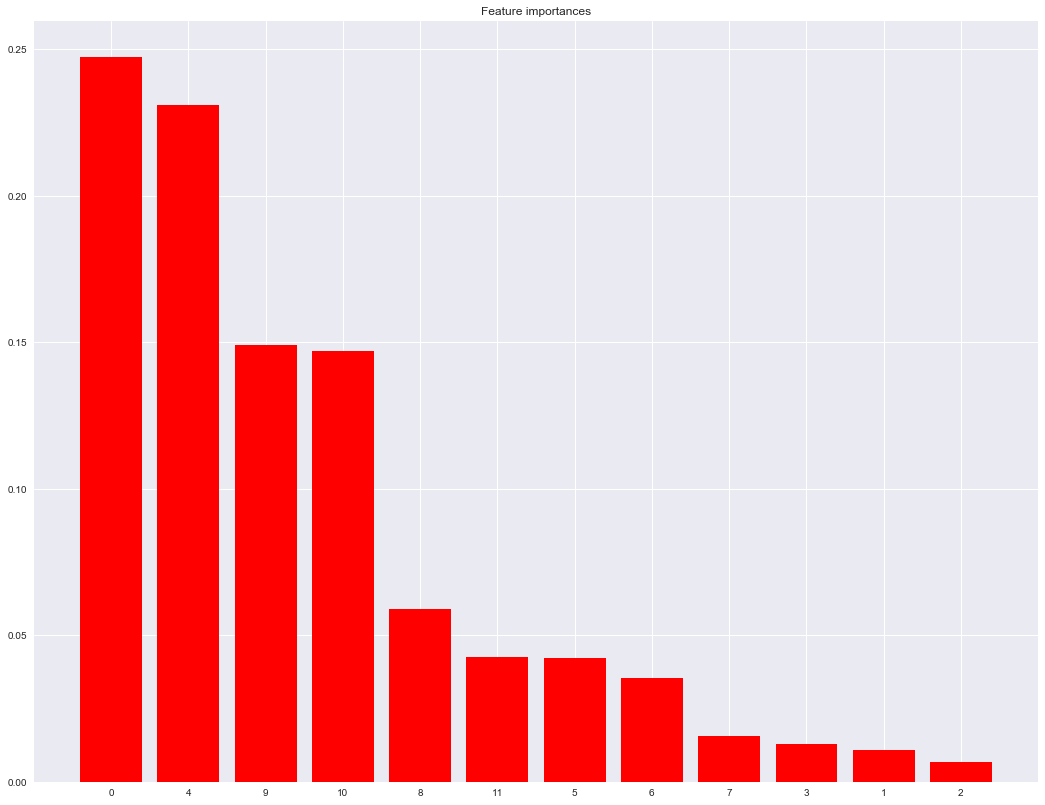

In [83]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
#X, y = make_classification(n_samples=1000,
#                           n_features=10,
#                          n_informative=3,
#                           n_redundant=0,
#                           n_repeated=0,
#                           n_classes=2,
#                           random_state=0,
#                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18,14))
plt.title("Feature importances")
#plt.bar(range(X.shape[1]), importances[indices],
#       color="r", yerr=std[indices], align="center")

plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")

plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Model Training
For the sake of early versions use all features for learning. Use 5 fold CV grid search (with 1 fold labelled test set and will not be the part of parameter tuning)

First split into 4:1 train/CV and test dataset

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

clf = xgb.XGBClassifier(
        nthread = 1,
        silent = 1,
        )
# specify parameters via map
parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [5,6,7,8],
              'subsample': [0.2,0.4,0.6,0.8],
              'colsample_bytree': [0.6,0.7,0.8]}
xgb_model = xgb.XGBClassifier()
clf = GridSearchCV(xgb_model, parameters, n_jobs=1, 
                   cv=4, 
                   scoring='roc_auc',
                   verbose=2, refit=False)
clf.fit(X_train,y_train)
best_param_4CV = clf.best_params_

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV] objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 
[CV]  objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 -   0.1s
[CV] objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 
[CV]  objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 -   0.0s
[CV] objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 
[CV]  objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 -   0.0s
[CV] objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 
[CV]  objective=binary:logistic, subsample=0.2, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 -   0.0s
[CV] objective=binary:logistic, subsample=0.4, learning_rate=0.05, colsample_bytree=0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  objective=binary:logistic, subsample=0.4, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 -   0.1s
[CV] objective=binary:logistic, subsample=0.4, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 
[CV]  objective=binary:logistic, subsample=0.4, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 -   0.0s
[CV] objective=binary:logistic, subsample=0.4, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 
[CV]  objective=binary:logistic, subsample=0.4, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 -   0.0s
[CV] objective=binary:logistic, subsample=0.4, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 
[CV]  objective=binary:logistic, subsample=0.4, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 -   0.0s
[CV] objective=binary:logistic, subsample=0.6, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 
[CV]  objective=binary:logistic, subsample=0.6, learning_rate=0.05, colsample_bytree=0.6, max_depth=5 -   0.0s
[CV] objective=binary:logistic, subsa

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   11.0s finished


Performance on the 4thCV fold

In [86]:
print('Best AUC score:'+str(clf.best_score_))
print('Best Param:' +str(clf.best_params_))

Best AUC score:0.863049616781
Best Param:{'objective': 'binary:logistic', 'subsample': 0.4, 'learning_rate': 0.05, 'colsample_bytree': 0.8, 'max_depth': 8}


Now check performance on accuracy basis.

In [87]:
clf2 = xgb.XGBClassifier(
        nthread = 1,
        silent = 1,
        colsample_bytree = best_param_4CV['colsample_bytree'],
        learning_rate = best_param_4CV['learning_rate'],
        max_depth =  best_param_4CV['max_depth'],
        objective = best_param_4CV['objective'],
        subsample = best_param_4CV['subsample']
        )
clf2.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print('Accuracy:'+str(accuracy_score(y_train,clf2.predict(X_train))))

Accuracy:0.890449438202


In [88]:
import pickle
# save the model to disk
pickle.dump(clf2, open(filename, 'wb'))

Now check performance on the test set.

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print('Test set AUC score:'+str(roc_auc_score(y_test,clf2.predict(X_test))))
print('Test set Accuracy:'+str(accuracy_score(y_test,clf2.predict(X_test))))

Test set AUC score:0.80694980695
Test set Accuracy:0.815642458101
